In [1]:
import xarray as xr
import numpy as np
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from xarray import DataArray
import pandas as pd
import pylab as plt
from scipy import signal

NAO index, difference between the mean sea level pressure anomalies between Azores (36°N–40°N, 28°W–20°W) and Iceland (63°N–70°N, 25°W–16°W) regions

reference: D.M.Smith 2020 Nature
https://doi.org/10.1038/s41586-020-2525-0

In [2]:
# 
data1      = xr.open_dataset("/work/uo1075/u241321/data/psl_DJF_ly_1970-2019_hindcast80_new.nc",decode_times=False) 

lat_min, lat_max = (36,40) # Azores
lon_min, lon_max = (-28,-20)
var1 = data1['psl'].sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# weight average in Azores
weights = np.cos(np.deg2rad(var1.lat))
weights.name = "weights"
air_weighted = var1.weighted(weights)
area1 = air_weighted.mean(("lon", "lat"))


# weight average in Iceland region
lat_min, lat_max = (63,70) # Iceland
lon_min, lon_max = (-25,-16)
var2 = data1['psl'].sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
weights2 = np.cos(np.deg2rad(var2.lat))
weights2.name = "weights"
air_weighted2 = var2.weighted(weights2)
area2 = air_weighted2.mean(("lon", "lat"))

hind1 = area1 - area2
hind = np.mean(hind1, axis=1)
hind.shape

(50, 10)

In [3]:
f = np.loadtxt('/work/uo1075/u241321/data/Hurrell_NAO_DJF.txt')[:,1]  # 1899-2023
hurrell = f[1970-1899:1970-1899+50] # 1970-2019
# np.corrcoef(hurrell, hind[:,0])[0,1]

In [3]:
np.save("/work/uo1075/u241321/data/NAO_DJF_hind80", hind/100)


In [4]:
nao = np.load("/work/uo1075/u241321/data/NAO_DJF_assi.npy")
np.corrcoef(hurrell, nao)[0,1]

NameError: name 'hurrell' is not defined

/tmp/ipykernel_3140120/1294794400.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, assi, '-', color='black', linestyle='dashed', linewidth=2, markersize=10, label = 'raw')


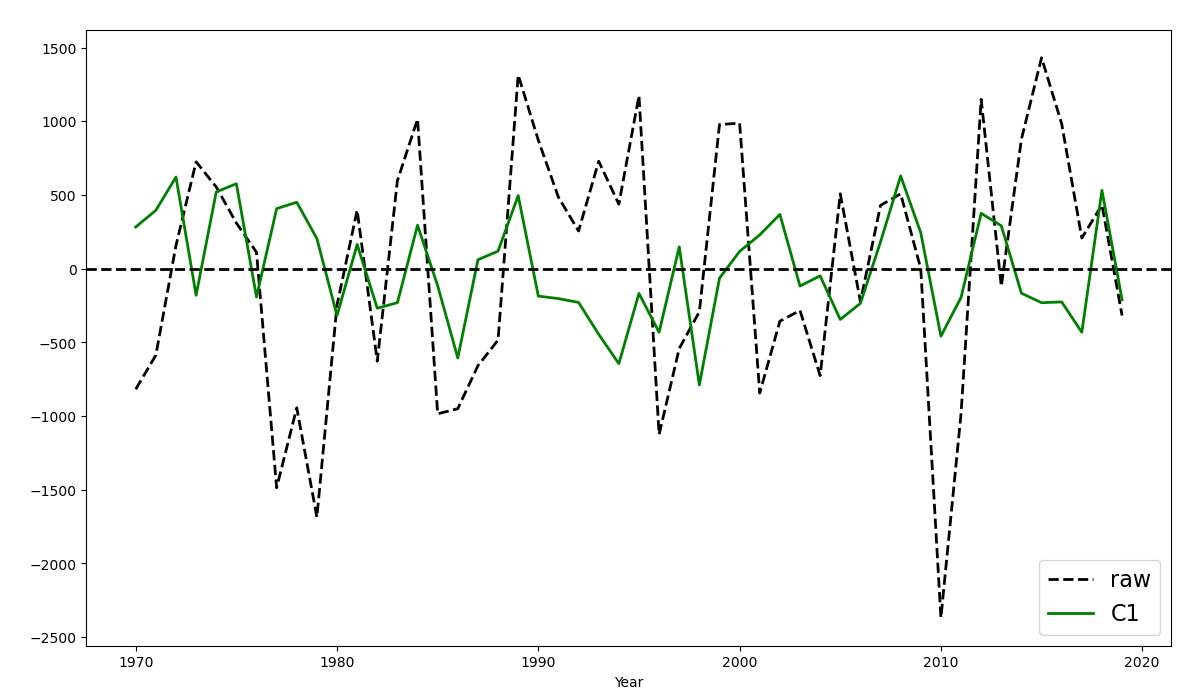

In [9]:
x = np.arange(1970,2020,1)


fig, ax = plt.subplots(figsize = [14,8])
# ax.plot(x, y0, '-', linestyle='dashed', color='black', linewidth=2, markersize=10, label = 'raw')
ax.plot(x, assi, '-', color='black', linestyle='dashed', linewidth=2, markersize=10, label = 'raw')
ax.plot(x, hind[:,0], 'g-', linewidth=2, markersize=10, label = 'C1')
# ax.plot(x, y3, '-', color='orangered', linewidth=2, markersize=10, label = 'C2')
# ax.plot(x, y4, '-', color='purple', linewidth=2, markersize=10, label = 'C3')
# ax.plot(x, y5, '-', color='blue', linewidth=2, markersize=10, label = 'C4')


ax.axhline(0, linewidth=2, color='black', linestyle= 'dashed')
ax.set(xlabel='Year', ylabel=' ',
       title=' ')
# ax.set_ylim(-0.1, 1.1)
# ax.grid()
ax.legend(loc='lower right', fontsize='16')
# ax.annotate('5%', fontsize='16',
#             xy=(80, 150), xycoords='figure points')

plt.rcParams["font.size"] = "20"
plt.show()

In [3]:
np.save("/work/uo1075/u241321/data/NAO_DJF_slp", assi/100.)

In [9]:
events = np.zeros((48))
w=-1
n=0
s=1
marksize = np.zeros((2,48))
s=1
l=100

for i in range(0,48,1):
        if y[i] <= -0.5*np.std(y):
            events[i] = w
            marksize[1,i] = l
            marksize[0,i] = s
        elif y[i] >= 0.5*np.std(y):
            events[i] = s
            marksize[0,i] = l
            marksize[1,i] = s
        else:
            events[i] = n
            


In [20]:
np.save("/work/uo1075/u241321/data/NAO_slp_run3", y)

In [11]:
nao = np.load("/work/uo1075/u241321/data/NAO_run3.npy")
np.corrcoef(y, nao)[0,1]

0.8100606716772136

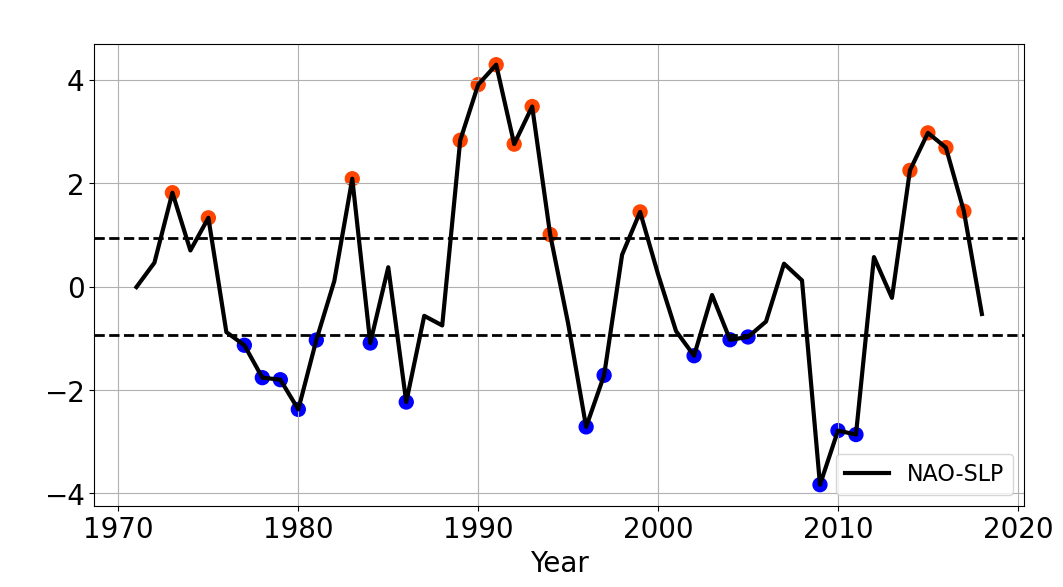

In [18]:
x = np.arange(1971,2019,1)

fig, ax = plt.subplots(figsize = [12,6])
ax.plot(x, y/100., '-', color='black', linewidth=3, markersize=10, label = 'NAO-SLP')
# ax.plot(x, nao, '-', linestyle='solid', color='blue', linewidth=3, markersize=10, label = 'NAO-CPC')
# ax.plot(x, y2, '-', color='orangered', linewidth=3, markersize=10, label = 'medium')
# ax.plot(x, y3, '-', linestyle='dashed', color='green', linewidth=3, markersize=10, label = '3-10 yr')
# ax.plot(x, y2, '-', linestyle='dashed', color='green', linewidth=3, markersize=10, label = 'detrend')
# ax.plot(x, y5, '-', linestyle='dashed', color='black', linewidth=3, markersize=10, label = '3-20 yr')
# ax.plot(x, y6, '-', color='orangered', linewidth=3, markersize=10, label = 'medium_spg')

ax.scatter(x, y/100,  marksize[0,:],color='orangered')
ax.scatter(x, y/100,  marksize[1,:],color='blue')

ax.axhline(0.5*np.std(y/100), linewidth=2, color='black', linestyle= 'dashed')
ax.axhline(-0.5*np.std(y/100), linewidth=2, color='black', linestyle= 'dashed')
ax.set(xlabel='Year', ylabel=' ',
       title=' ')
# ax.set_ylim(-0.1, 1.1)
ax.grid()
ax.legend(loc='lower right', fontsize='16')
# ax.annotate('5%', fontsize='16',
#             xy=(80, 150), xycoords='figure points')

plt.rcParams["font.size"] = "20"
plt.show()
# fig.savefig('/work/uo1075/u241321/results/EEMD_ACC_sst.pdf')

In [2]:
nao = np.load("/work/uo1075/u241321/data/NAO_slp.npy")

In [5]:
"""
Applying a bandpass filter
(the difference of two lowpass lanczos filters)
to a time-series.
==================================
This example demonstrates low pass filtering a time-series by applying a
weighted running mean over the time dimension.
The time-series used here is the EAR5 Reanalysis hourly 850hpa vorticity,
which is first averaged to daily data, and then filtered using two different
Lanczos filters, one to filter out time-scales of less than 3 years and one
to filter out time-scales of less than 10 years.
References
----------
    Duchon C. E. (1979) Lanczos Filtering in One and Two Dimensions.
    Journal of Applied Meteorology, Vol 18, pp 1016-1022.
"""

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, savefig
import matplotlib.colors
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER



def low_pass_weights(window, cutoff):
    """Calculate weights for a low pass Lanczos filter.
    Args:
    window: int
        The length of the filter window.
    cutoff: float
        The cutoff frequency in inverse time steps.
    """
    order = ((window - 1) // 2 ) + 1
    nwts = 2 * order + 1
    w = np.zeros([nwts])
    n = nwts // 2
    w[n] = 2 * cutoff
    k = np.arange(1., n)
    sigma = np.sin(np.pi * k / n) * n / (np.pi * k)
    firstfactor = np.sin(2. * np.pi * cutoff * k) / (np.pi * k)
    w[n-1:0:-1] = firstfactor * sigma
    w[n+1:-1] = firstfactor * sigma
    return w[1:-1]

def low_pass(ts, window, cutyear):
    window = window
    fw = low_pass_weights(window, 1. / cutyear)
    weight = xr.DataArray(fw, dims = ['window'])
    daily_data = ts
    # apply the filters using the rolling method with the weights
    lowpass = daily_data.rolling(time = len(fw), center = True).construct('window').dot(weight)
    return lowpass

In [9]:
nao1 = xr.DataArray(nao,  
                    dims=['time'],
                    coords=dict(
                        time=np.arange(0,50,1))
                    , )
nao1
cut_year = 8
nao_l = low_pass(nao1, 5, cut_year)
nao_l

<xarray.DataArray (time: 50)>
array([        nan,         nan,  0.51670774,  0.88538633,  0.86599853,
        0.44413807, -0.28166273, -0.92470932, -1.21333881, -1.46524983,
       -1.4104499 , -0.81592195,  0.23941341,  0.55807516,  0.08509467,
       -0.50936984, -0.85265013, -0.78462206,  0.17746471,  1.63568164,
        2.80265441,  2.85882268,  2.5179614 ,  1.99560596,  0.90103511,
       -0.59049852, -1.45206799, -1.02956773,  0.16744128,  0.68257108,
        0.19869243, -0.52264716, -0.68518123, -0.52449065, -0.59704401,
       -0.68361748, -0.34801815,  0.0471375 , -0.62743121, -1.90604411,
       -2.30613793, -1.47790415, -0.3988349 ,  0.47730595,  1.35112181,
        2.03559937,  1.8401399 ,  0.9501282 ,         nan,         nan])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49

In [11]:
np.save("/work/uo1075/u241321/data/NAO_l8", nao_l)

In [12]:
cut_year = 3
nao_l = low_pass(nao1, 5, cut_year)
nao_l
np.save("/work/uo1075/u241321/data/NAO_l3", nao_l)

In [13]:
nao_l

<xarray.DataArray (time: 50)>
array([        nan,         nan,  1.57619677,  0.93328557,  1.6864438 ,
        0.99701681, -0.26763807, -2.17630815, -1.55142985, -1.24651718,
       -3.26253204, -1.89733125,  1.49046427,  1.929909  ,  0.1882755 ,
       -2.25696461,  0.28118728, -2.30666101, -1.69596125,  3.75844458,
        5.11233822,  3.46291412,  3.47652857,  3.04032693,  2.40315177,
       -1.54764743, -3.75560672, -2.06308023,  0.8292815 ,  2.70229264,
        0.37698751, -2.08712612, -0.98618398, -0.16727518, -0.47765896,
       -1.8473342 , -0.83949113,  1.1248641 ,  1.04029586, -3.65260745,
       -6.4597175 , -0.15249991,  0.06629893, -0.78914803,  2.19187329,
        4.41427902,  2.49760835,  1.19589418,         nan,         nan])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49